In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics

# Base

In [2]:
# Importando a base
train = pd.read_csv('train_treated.csv')

## Dividindo entre treino e teste

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

# Criando dicionario de scores

In [4]:
metrics_dict = {}

In [5]:
def update_dict(name, predict, classifier, dictionary):
    dictionary[name] = {
        'label': name, 
        'accuracy': metrics.accuracy_score(predict, y_test), 
        'recall': metrics.recall_score(predict, y_test), 
        'precision': metrics.precision_score(predict, y_test), 
        'F1': metrics.f1_score(predict, y_test),
        'predict': predict,
        'classifier': classifier
    }
    return dictionary
    
def update_score_dict(name, predict, classifier):
    update_dict(name, predict, classifier, metrics_dict)

# Bagging e boosting

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [7]:
# Logistic
def test_num_estimators(classifier, estimator):
    num_estimators = [10, 20, 25, 30, 40, 60, 80]
    results_dict = {elem: {} for elem in num_estimators}


    for i in num_estimators:
        classif = classifier(base_estimator=estimator, n_estimators=i, random_state=0)
        classif.fit(x_train, y_train)
        classif_predict = classif.predict(x_test)
        update_dict(i, classif_predict, classif, results_dict)
        
    return results_dict

## Boosting

In [8]:
def test_num_estimators_for_boosting(estimator):
    return test_num_estimators(AdaBoostClassifier, estimator)

## Bagging

In [9]:
def test_num_estimators_for_bagging(estimator):
    return test_num_estimators(BaggingClassifier, estimator)

# LogisticRegression

In [10]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=700)

In [11]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

In [12]:
update_score_dict('Logistic', logisticR_predict, logisticR)

In [13]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.72619,0.72619,0.72619,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."


## Boosting

In [14]:
results_dict = test_num_estimators_for_boosting(logisticR)

In [15]:
# Ordered by F1
newlist = sorted(list(results_dict.values()), key=lambda k: k['F1']) 
pd.DataFrame(newlist)

,label,accuracy,recall,precision,F1,predict,classifier
0,10,0.798206,0.830508,0.583333,0.685315,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
1,25,0.793722,0.737500,0.702381,0.719512,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,60,0.789238,0.717647,0.726190,0.721893,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
3,80,0.789238,0.717647,0.726190,0.721893,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
4,20,0.802691,0.763158,0.690476,0.725000,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
5,40,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
6,30,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."


In [16]:
adaboost_logistic_best = results_dict[30]

In [17]:
update_score_dict('Ada Logistic', adaboost_logistic_best['predict'], adaboost_logistic_best['classifier'])

In [18]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.72619,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.72619,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."


# Máquina de Vetor Suporte

In [19]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Treinando e prevendo com default
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [21]:
update_score_dict('SVM', supportV_predict, supportV)

In [22]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."


## Bagging

In [23]:
results_dict = test_num_estimators_for_bagging(supportV)

In [24]:
# Ordered by F1
newlist = sorted(list(results_dict.values()), key=lambda k: k['F1']) 
pd.DataFrame(newlist)

,label,accuracy,recall,precision,F1,predict,classifier
0,80,0.721973,0.805556,0.345238,0.483333,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
1,10,0.721973,0.789474,0.357143,0.491803,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
2,40,0.730942,0.815789,0.369048,0.508197,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
3,60,0.730942,0.815789,0.369048,0.508197,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
4,20,0.730942,0.800000,0.380952,0.516129,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
5,30,0.730942,0.800000,0.380952,0.516129,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
6,25,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."


In [25]:
bagging_svm_best = results_dict[25]

In [26]:
update_score_dict('Bagging SVM', bagging_svm_best['predict'], bagging_svm_best['classifier'])

In [27]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
3,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."


# Decision tree

In [28]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [29]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

In [30]:
update_score_dict('Decision Tree', decisionT_predict, decisionT)

In [31]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
3,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
4,Decision Tree,0.757848,0.678571,0.678571,0.678571,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


## Boosting

In [32]:
results_dict = test_num_estimators_for_boosting(decisionT)

In [33]:
# Ordered by F1
newlist = sorted(list(results_dict.values()), key=lambda k: k['F1']) 
pd.DataFrame(newlist)

,label,accuracy,recall,precision,F1,predict,classifier
0,10,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1,20,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
2,25,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,30,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
4,40,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
5,60,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
6,80,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


In [34]:
adaboost_decisionT_best = results_dict[10]

In [35]:
update_score_dict('Ada Decision Tree', adaboost_decisionT_best['predict'], adaboost_decisionT_best['classifier'])

In [36]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
3,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
4,Decision Tree,0.757848,0.678571,0.678571,0.678571,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Ada Decision Tree,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


# Redes Neurais

In [37]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42)

In [38]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [39]:
update_score_dict('Neural', neuralN_predict, neuralN)

In [40]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
3,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
4,Decision Tree,0.757848,0.678571,0.678571,0.678571,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Ada Decision Tree,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
6,Neural,0.798206,0.689320,0.845238,0.759358,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.0001,..."


## Bagging

In [41]:
results_dict = test_num_estimators_for_bagging(neuralN)

In [42]:
# Ordered by F1
newlist = sorted(list(results_dict.values()), key=lambda k: k['F1']) 
pd.DataFrame(newlist)

,label,accuracy,recall,precision,F1,predict,classifier
0,80,0.739910,0.691176,0.559524,0.618421,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
1,60,0.748879,0.712121,0.559524,0.626667,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
2,30,0.739910,0.680556,0.583333,0.628205,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
3,40,0.744395,0.690141,0.583333,0.632258,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
4,20,0.744395,0.684932,0.595238,0.636943,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
5,25,0.744395,0.684932,0.595238,0.636943,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
6,10,0.757848,0.697368,0.630952,0.662500,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."


In [43]:
bagging_neuralN_best = results_dict[10]

In [44]:
update_score_dict('Bagging Neural', bagging_neuralN_best['predict'], bagging_neuralN_best['classifier'])

# Scores

In [45]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
2,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
3,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
4,Decision Tree,0.757848,0.678571,0.678571,0.678571,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Ada Decision Tree,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
6,Neural,0.798206,0.689320,0.845238,0.759358,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.0001,..."
7,Bagging Neural,0.757848,0.697368,0.630952,0.662500,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."


In [46]:
# Ordered by F1
newlist = sorted(list(metrics_dict.values()), key=lambda k: k['F1']) 
f1_ordered = pd.DataFrame(newlist)
f1_ordered

,label,accuracy,recall,precision,F1,predict,classifier
0,SVM,0.713004,0.812500,0.309524,0.448276,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","SVC(C=1000, break_ties=False, cache_size=200, ..."
1,Bagging SVM,0.735426,0.804878,0.392857,0.528000,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","(SVC(C=1000, break_ties=False, cache_size=200,..."
2,Bagging Neural,0.757848,0.697368,0.630952,0.662500,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","(MLPClassifier(activation='relu', alpha=0.0001..."
3,Decision Tree,0.757848,0.678571,0.678571,0.678571,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,Ada Decision Tree,0.775785,0.717949,0.666667,0.691358,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
5,Logistic,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
6,Ada Logistic,0.807175,0.753086,0.726190,0.739394,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","(LogisticRegression(C=1.0, class_weight=None, ..."
7,Neural,0.798206,0.689320,0.845238,0.759358,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.0001,..."


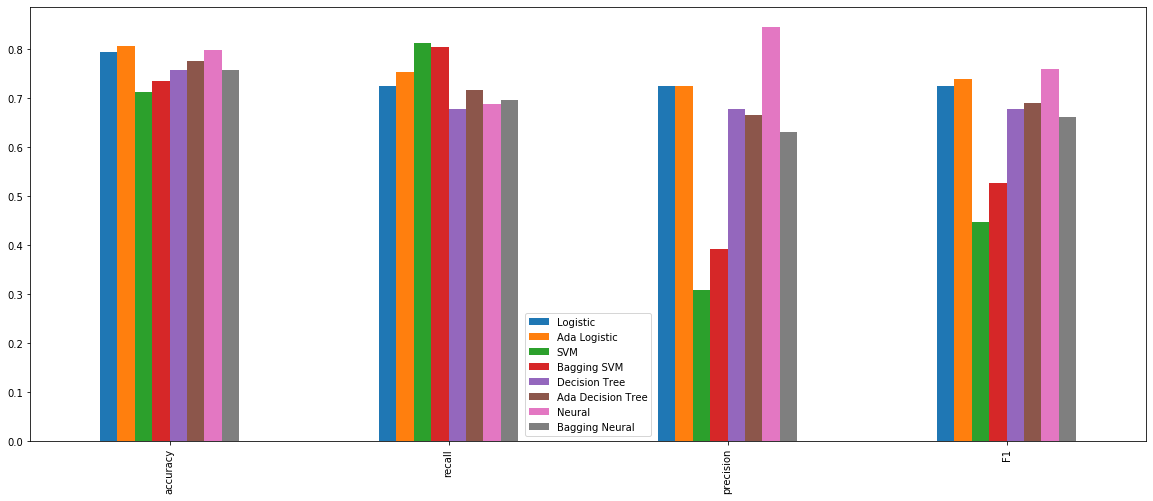

In [47]:
pd.DataFrame(metrics_dict).drop(['label', 'predict', 'classifier']).plot(kind='bar', figsize=(20,8))

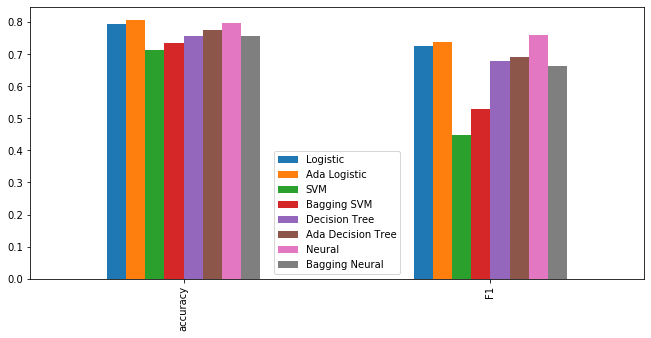

In [52]:
pd.DataFrame(metrics_dict).drop(['label', 'recall', 'precision', 'predict', 'classifier']).plot(kind='bar', figsize=(11,5))

# Salvando resultados

In [49]:
keys = ['Ada Logistic', 'Bagging SVM', 'Ada Decision Tree', 'Neural']
selected_methods_dict = {x:metrics_dict[x] for x in keys}

In [50]:
# salvando 
import pickle
filename = 'amostragem_scores'
outfile = open(filename,'wb')
pickle.dump(selected_methods_dict, outfile)
outfile.close()